## 7. Theoretical question
### 7.1 Try solving the problem mentioned above using three different sorting algorithms (do not use any MapReduce algorithm).

In [5]:
import time
import sys 

In [6]:
def my_mean(lista,N):                   
    return (round(sum(lista)/N,2))                #we have to implemented manually the mean

In [8]:
#this is a function to put in a list name,surname and mean for each person
#this function will be useful to apply the sorting function 
def openApplicants():
    with open('ApplicantsInfo.txt','r',encoding='utf-8') as file:           #open the file that we have to order
        line = file.readline().split()                                      #read and split the first line of the txt document
        num_pers = int(line[0])                                             #number of person to order
        num_voti = int(line[1])                                             #number of items on which to calculate the average
        people = []                                                     
        for _ in (range(num_pers)):
            line = file.readline().split()
            aver = my_mean([float(x) for x in line[2:num_voti+2]],num_voti)   #computing the mean
            people.append([line[0],line[1],aver])
    return people                          #create the new list with name,surname and mean

In [10]:
def selection_sort(lista):
    N = len(lista)
    for i in range(N):
        max_i = i                                                       #inizialize the maximum at the index i
        for  j in range(i+1,N):                                         #search for the maximum on the lista[i+1:N]
            if( lista[max_i][2] < lista[j][2]):
                max_i = j                                               #if it's bigger, swap
            elif (lista[max_i][2] == lista[j][2]):                      #if score equal, control alphabetically who comes first
                if((lista[j][0]+lista[j][1]).lower() < (lista[max_i][0] +lista[max_i][1]).lower()):
                    max_i = j                                           #if alphabetically comes first, swap
        temp = lista[i]
        lista[i] = lista[max_i]
        lista[max_i] = temp
    return lista

In [11]:
def mergesort(lista):
    if len(lista)>1:
        M = len(lista)//2
        left = lista[:M]
        right = lista[M:]

        mergesort(left)
        mergesort(right)
        i=0
        j=0
        k=0

        while(i<len(left) and j<len(right)):
            if (left[i][2]>right[j][2]):
                lista[k] = left[i]
                i+=1
            elif (left[i][2]==right[j][2]):
                if(left[i][0]+left[i][1].lower() < right[j][0]+right[j][1].lower()):
                    lista[k] = left[i]
                    i+=1
                else:
                    lista[k] = right[j]
                    j+=1
            else:
                lista[k] = right[j]
                j+=1
            k+=1
        while(i<len(left)):
            lista[k] = left[i]
            i+=1
            k+=1
        while(j<len(right)):
            lista[k] = right[j]
            j+=1
            k+=1
    return lista
    

In [12]:
def bubble_sort(lista):
    n = len(lista)
    for i in range(n):
        swapped = False
        for j in range(0,n-i-1):
            if lista[j][2]<lista[j+1][2]:
                temp = lista[j]
                lista[j] = lista[j+1]
                lista[j+1] = temp
            elif lista[j][2]==lista[j+1][2]:
                if(lista[j+1][0]+lista[j+1][1].lower() < lista[j][0]+lista[j][1].lower()):
                    temp = lista[j]
                    lista[j] = lista[j+1]
                    lista[j+1] = temp
            swapped = True
        if not swapped:
            break
    return lista
            

### 7.2 What is the time complexity of each algorithm you have used?

### SELECTION SORT
We know that the time complexity of finding the min/ max over and array of k element is a $O(k)$.\
What we do in the function __selection_sort__ is finding the max $n-1$ times over an array that each iteration his dimention decrease by 1.\
At the beginning, the size of sorted sub-array (say L) is 0 and the size of unsorted sub-array (say R) is n.\
At each step, the size of sorted sub-array increases by 1 and size of unsorted sub-array decreases by 1. Hence, for a few steps are as follows:
* Step 1: L: 0, R: n
* Step 2: L: 1, R: n-1
* Step 3: L: 2, R: n-2 and so on till S1 = n-1(since the last element will be already sorted). So:
$$T(n)=\sum_{i=0}^{n-1}(n-i)+c\overset{j=n-i}{=}\sum_{j=1}^{n}j+c=\frac{n(n-1)}{2}+c=O(n^2)$$

### MERGE SORT
The Merge Sort use the Divide-and-Conquer approach to solve the sorting problem. First, it divides the input in half using recursion.\
 After dividing, it sort the halfs and merge them into one sorted output.\
 The number of steps needed to finish the division of the all array of lenght $n$ will be $log$ n.\
 And finally to merge the subarrays, made by dividing the original array of n elements, a running time of $O(n)$ will be required.\
 The time complexity of Merge Sort is:
 $$T(n)=2T(n/2)+c\cdot n=2\cdot(T(n/4)+c\cdot n/2)+c\cdot n$$
 Where $n$ can be subtituted to $2^k$ and the value of $k$ is $log$ n.
 $$T(n)=2^k\cdot (T(n/2^k))+k\cdot c\cdot n$$
 $$T(n) = n\cdot T(1) + n\cdot logn = O(n\cdot log(n))$$
And that is regardless of whether the input elements are presorted or not.\
 Merge Sort is therefore no faster for sorted input elements than for randomly arranged ones.

### BUBBLE SORT
We have inserted a stop condition for the bubble sort that terminates execution when there are no more swaps to be made.    
In any case, this choice does not affect our calculation of the running time.\
As we have observed in the case of Insertion Sort, also in Bubble Sort the inner loop is iterating:
$$n + (n-1) + (n-2) + (n-3) + ... + 1=\frac{n\cdot(n-1)}{2}$$ 
times. And also in this case the complexity is $$O(n^2)$$


### 7.3 Evaluate the time taken for each of your implementations to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [16]:
sel_people = openApplicants()
start=time.time()                                      
selection_sort(sel_people)
end=time.time()
sel_time = str(end-start)
print("Sort the file in ",sel_time)

Sort the file in  644.5567920207977


In [26]:
mer_people = openApplicants()
start = time.time()
mergesort(mer_people)
end = time.time()
merge_time = str(end-start)
print("Sort the file in ",merge_time)

Sort the file in  0.8946051597595215


In [17]:
bub_people = openApplicants()
start = time.time()
bubble_sort(bub_people)
end = time.time()
bubble_time = str(end-start)
print("Sort the file in ",bubble_time)

Sort the file in  1300.0288183689117


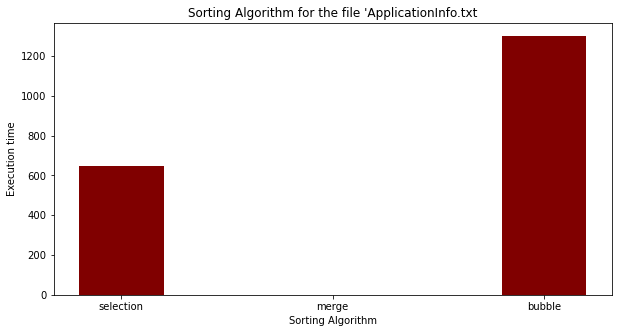

In [30]:
import numpy as np
import matplotlib.pyplot as plt

lista = [float(sel_time),float(merge_time),float(bubble_time)]
names = ['selection','merge','bubble']

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, lista1, color ='maroon',
        width = 0.4)
 
plt.xlabel("Sorting Algorithm")
plt.ylabel("Execution time")
plt.title("Sorting Algorithm for the file 'ApplicationInfo.txt")
plt.show()

We now create the file 'RankingList.txt' as requested.

In [14]:
with open('RankingList.txt','w') as f:
    for i in mer_people:
        f.write(i[0]+' '+i[1]+' '+str(i[2])+'\n')

### 7.4 What is the most optimal algorithm, in your opinion, and why?
Although bubble sort has the same running time as insertion sort it is the one that definitely works worse.\
On average, the bubble sort performs poorly compared to the insertion sort. Due to the high number of swaps, it’s expected to generate twice as many write operations. Therefore, we don’t prefer this algorithm for an ordinary sorting job. Bubble sort is good when looking for a small error or when the list is almost all sorted.\
Merge sort is definitely preferred for huge data sets. This is because it happens to compare all the elements present in the array hence is not much helpful for small datasets. Insertion sort however, is the go-to for fewer elements. It becomes fast when data is already sorted or nearly sorted because by default, it skips the sorted values. At each step in the mergesort, we recurse to a sublist that is half the size of the current sublist.\
Mergesort partitions the list into two equal length sublists and sorts these recursively before merging the two lists. There is an O(log N) running time for the partitioning process and O(N) for the merging process resulting in an O(N log N) running time.\
Infact as we can see from the result in the point 7.3, mergesort perform much better than the other two algorithms.

### 7.5 Implement a sorting algorithm using MapReduce and compare it against the three algorithms previously implemented using the ApplicantsInfo.txt file.

This point was made on EMR via PySpark.

First, we have uploaded the txt file 'ApplicantsInfo.txt' in a bucket on S3.

In [ ]:
applicants = sc.textFile('s3://mapreduceadm/ApplicantsInfo.txt')

Now we know that in the first row of the file we have two integers, one says to us the number of people,\
the second says to us how many grades for person we have.

In [ ]:
Num_pers, Num_voti = applicants.take(1)[0].split()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
applicants_first = applicants.take(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now we apply filter for not consider the first line, in which we don't have the person, but just the two integers described before.\
Then with map we split the row to have 'name','surname' and the Num_voti grades.\
Then with map we compute the mean for each person and combine 'name' and 'surname' together.\
Then we finally order with the function takeOrdered in ascending way on the grade and if it is a drawn,\
the one that comes before alphabetically go higher.\
The time execution is 7.72s, so in this case the MergeSort we computed works better and this is completely understandable\
since the advantage of MapReduce on Sparks is really effective on large dataset.

In [ ]:
applicants.filter(lambda row: row!=applicants_first[0])\
.map(lambda row: row.split())\
.map(lambda row: (round(sum([float(x) for x in row[2:]])/int(Num_voti),2), row[0]+" "+row[1]))\
.takeOrdered(int(Num_pers), lambda x: (-x[0],x[1]))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(24.49, 'Emily Crispin'), (24.49, 'Patricia Witten'), (24.45, 'Bruce Johnson'), (24.45, 'Doreen Richmond'), (24.44, 'David Niederberger'), (24.44, 'Keisha Keene'), (24.44, 'Steven Boston'), (24.42, 'John Johnson'), (24.42, 'Marvin Ramirez'), (24.42, 'Melody Sanchez'), (24.41, 'Edith Lehtonen'), (24.41, 'Ida Mccabe'), (24.41, 'Joshua Reece'), (24.41, 'Luisa Young'), (24.41, 'Manuel Sullinger'), (24.4, 'Betty Kubiak'), (24.4, 'Cara Baird'), (24.4, 'Mattie Salinas'), (24.4, 'Particia Mirabal'), (24.4, 'Violet Paulino'), (24.39, 'Amy Walker'), (24.39, 'Harry Lupu'), (24.39, 'Jeffrey Johnson'), (24.39, 'Josephine Young'), (24.39, 'Kathleen Whaley'), (24.39, 'Kelsey Mcneill'), (24.39, 'Latoya Stemp'), (24.39, 'Marie Wall'), (24.39, 'Richard Parker'), (24.38, 'Amanda Williams'), (24.38, 'Daryl Singer'), (24.38, 'David Kerns'), (24.38, 'Desiree Paul'), (24.38, 'Jackson Klopfer'), (24.38, 'Jeramy Galicia'), (24.38, 'Juan Gonzalez'), (24.38, 'Kyle Carlson'), (24.38, 'Mary Nguyen'), (24.38, 'Nor